In [1]:
import glob
import re
import os
from PIL import Image,ImageOps,ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import unicodedata

# -*- coding: utf-8 -*-

yolo_size = 416

resize_size = (200, 200)



In [2]:
# CIFAR10をバックグラウンド画像として使用
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import numpy as np

# データセットの取得
dataset = CIFAR10(root='./data', train=True, download=True)

# NumPy配列からPIL Imageに変換
base_images = []
for img, _ in dataset:
    # CIFAR10の画像はすでにPIL Imageとして取得されるので、
    # そのまま使用可能
    base_images.append(img)

base_images_length = len(base_images)
print(f"背景画像の数: {base_images_length}")

Files already downloaded and verified
背景画像の数: 50000


In [3]:
icons = glob.glob("main_icons/*.png")

class_list = []
for path in icons:
    # main_icons/Weapon-Name.png の形式から武器名だけを抽出
    weapon_name = path.replace('main_icons/', '').replace('.png', '')
    class_list.append(weapon_name)
print(class_list)

f = open('weapon_list.txt', 'w')
for x in class_list:
    f.write(str(x) + "\n")
f.close()

['E-liter-4K', 'Nautilus-47', 'Dapple-Dualies-Nouveau', 'Custom_Explosher', 'Order_Blaster_Replica', 'Octobrush', 'Flingza-Roller', 'Luna-Blaster', 'Annaki_Splattershot_Nova', 'Splat-Dualies', 'Tentatek-Splattershot', 'Neo_Sploosh-o-matic', 'Splattershot', 'Order_Roller_Replica', 'Custom_Douser_Dualies_FF', 'Enperry_Splat_Dualies', 'Dark-Tetra-Dualies', 'Explosher', 'Custom_Hydra_Splatling', 'Slosher', 'Mini-Splatling', 'Custom_Goo_Tuber', 'Tenta-Brella', 'Glooga-Dualies', 'Inkbrush-Nouveau', 'Splash-o-matic', 'Mint_Decavitator', 'Dapple-Dualies', 'Slosher-Deco', 'Goo-Tuber', 'Undercover-Brella', 'Order_Splatling_Replica', 'Splat-Charger', 'Order_Shot_Replica', 'Gold_Dynamo_Roller', '96-Gal', 'L-3_Nozzlenose_D', 'Ballpoint_Splatling_Nouveau', 'Jet-Squelcher', 'Bloblobber_Deco', 'LACT-450', 'Carbon-Roller-Deco', 'Aerospray-RG', 'Zink-Mini-Splatling', 'Range-Blaster', 'Blaster', 'Hero-Shooter-Replica', 'Custom_Range_Blaster', 'Splat-Brella', 'Order_Stringer_Replica', 'Inkbrush', 'Inkline

In [4]:
import cv2
from PIL import ImageEnhance    #ImageEnhanceのインポート
def take_path_generate_dataset(weapons_dir_path):
    label_info = []
    # base_pathはすでにPIL Imageオブジェクト
    base = base_images[random.randint(0, base_images_length-1)]
    base = base.resize(resize_size)  # リサイズ
    base = base.filter(ImageFilter.BLUR)
    
    for i in range(0,1):
        logo_relative_positions = [random.uniform(-0.5, 0.0), random.uniform(-0.5, 0.0)]
        logo_position = (int(100*logo_relative_positions[0]), int(100*logo_relative_positions[1]))

        label = random.choice(class_list)
        
        logo = Image.open(f'{weapons_dir_path}/{label}.png')
        logo_w, logo_h = logo.size
        
        logo_scale_x = random.uniform(0.7, 1.1)
        logo_scale_y = random.uniform(0.7, 1.1)

        logo = logo.resize((int(logo_w * logo_scale_x), int(logo_h * logo_scale_y)))
        
        #色のオーグメンテーション
        logo = ImageEnhance.Color(logo)
        logo = logo.enhance(random.uniform(0, 1))
        
        if random.randint(0,10) < 2:
            logo = logo.rotate(random.randint(-10,10), expand=True)
        
        base.paste(logo, logo_position, logo)
        
    return label, base


Heavy_Edit_Splatling


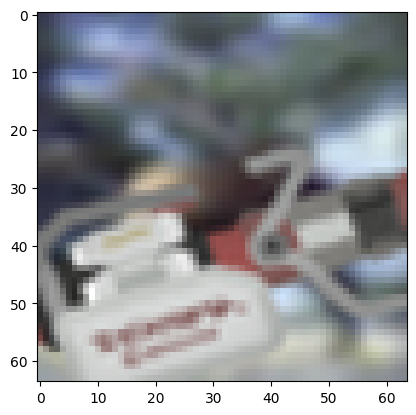

In [5]:
label, base = take_path_generate_dataset("main_icons")
print(label)
randomized_size = random.randint(32,64)
base = base.resize((randomized_size,randomized_size))
base = base.resize((64,64))
plt.imshow(np.array(base))
plt.show()

In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

dataset_directory = "main_training_dataset"
!rm -rf main_training_dataset
import os

if not os.path.exists(dataset_directory):
   os.makedirs(dataset_directory)

for i in range(10000):
        label, base = take_path_generate_dataset("main_icons")
        if not os.path.exists(f"{dataset_directory}/{label}"):
            print(f"{dataset_directory}/{label}")
            os.mkdir(f"{dataset_directory}/{label}")
        randomized_size = random.randint(32,64)
        base = base.resize((randomized_size,randomized_size))
        base = base.resize((64,64))
        base.save(f"{dataset_directory}/{label}/{time.time()}.jpg", quality=95)

main_training_dataset/Explosher
main_training_dataset/Douser_Dualies_FF
main_training_dataset/Zink-Mini-Splatling
main_training_dataset/Aerospray-RG
main_training_dataset/Ballpoint-Splatling
main_training_dataset/Ballpoint_Splatling_Nouveau
main_training_dataset/Carbon-Roller-Deco
main_training_dataset/Luna-Blaster-Neo
main_training_dataset/Splat-Brella
main_training_dataset/H-3-Nozzlenose
main_training_dataset/Aerospray
main_training_dataset/Gold_Dynamo_Roller
main_training_dataset/Rapid-Blaster
main_training_dataset/Splatana-Stamper
main_training_dataset/Heavy_Splatling_Deco
main_training_dataset/LACT-450
main_training_dataset/Custom_Jet_Squelcher
main_training_dataset/Heavy-Splatling
main_training_dataset/Splat-Charger
main_training_dataset/Big_Swig_Roller_Express
main_training_dataset/Custom_Range_Blaster
main_training_dataset/Jet-Squelcher
main_training_dataset/Dark-Tetra-Dualies
main_training_dataset/Splattershot-Pro
main_training_dataset/Order_Splatana_Replica
main_training_data